# **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Package Imports and Installments**

In [ ]:
!pip install art

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import plotly
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from art import *
import seaborn as sns
sns.set_theme(style = 'ticks')
import warnings
warnings.filterwarnings('ignore')

# **Reading Data from the data files**

In [2]:
# From GDrive
NASDAQ_data_path = "/content/drive/MyDrive/ALDA_project/Dataset/nasdaq.csv"
DAX_data_path = "/content/drive/MyDrive/ALDA_project/Dataset/DAX.csv"
CAC_40_data_path = "/content/drive/MyDrive/ALDA_project/Dataset/cac_40.csv"
BSE_data_path = "/content/drive/MyDrive/ALDA_project/Dataset/BSE_updated.csv"

In [ ]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
NASDAQ = pd.read_csv(NASDAQ_data_path,parse_dates=['Date'], date_parser=dateparse) #/content/drive/MyDrive/ALDA/Project/Indexes/^NSEI(NIFTY).csv
DAX = pd.read_csv(DAX_data_path,parse_dates=['Date'], date_parser=dateparse) #/content/drive/MyDrive/ALDA/Project/Indexes/SNP.csv
CAC_40 = pd.read_csv(CAC_40_data_path,parse_dates=['Date'], date_parser=dateparse)
BSE = pd.read_csv(BSE_data_path,parse_dates=['Date'], date_parser=dateparse)
mask = (BSE=='-').any(axis=1)
BSE = BSE.drop(BSE[mask].index)
BSE = BSE.astype({'Open': 'float64', 'High': 'float64', 'Low': 'float64', 'Close': 'float64', 'Adj Close': 'float64', 'Volume': 'float64'})
indexes=['NASDAQ','DAX',"CAC_40", "BSE"]

In [ ]:
print(NASDAQ.columns)
print(DAX.columns)
print(CAC_40.columns)
print(BSE.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# **Pre - Processing**


## *Defining Fuctions*

In [ ]:
def data_description(data,index):
  statement = "The description for the {} Index:".format(index)
  milestone(statement)

  tprint(index.upper())

  print("Size of {} Index Dataset is {} and ({},{}) containing {} rows and {} columns \n".format(index,
                                                                                data.size,
                                                                                len(data),
                                                                                len(data.columns),
                                                                                len(data),
                                                                                len(data.columns)))

In [ ]:
def milestone(statement,n=100,symbol = "-"):
  print("\n" + statement.center(n,symbol) + "\n")

In [ ]:
def fill_missing_values(data,index):
  null_cols = pd.isnull(data["Open"])
  null_dates = data[null_cols]["Date"]
  # print(null_dates)

  print("There are {} null data point present in the {} index".format(len(null_dates),index))

  for date in null_dates:
    ind = data.index[data["Date"] == date].tolist()[0]

    prev_index = 1
    next_index = 1

    iter = ind

    while(pd.isnull(data.iloc[ind-prev_index]["Open"])):
      prev_index=prev_index+1

    while(pd.isnull(data.iloc[ind+next_index]["Open"])):
      next_index=next_index+1

    data.at[ind,"Open"] = data.iloc[ind- prev_index]["Open"] + ((data.iloc[ind + next_index]["Open"] - data.iloc[ind - prev_index]["Open"])/(prev_index+next_index))
    data.at[ind,"High"] = data.iloc[ind- prev_index]["High"] + ((data.iloc[ind + next_index]["High"] - data.iloc[ind - prev_index]["High"])/(prev_index+next_index))
    data.at[ind,"Low"] = data.iloc[ind- prev_index]["Low"] + ((data.iloc[ind + next_index]["Low"] - data.iloc[ind - prev_index]["Low"])/(prev_index+next_index))
    data.at[ind,"Close"] = data.iloc[ind- prev_index]["Close"] + ((data.iloc[ind + next_index]["Close"] - data.iloc[ind - prev_index]["Close"])/(prev_index+next_index))
    data.at[ind,"Adj Close"] = data.iloc[ind- prev_index]["Adj Close"] + ((data.iloc[ind + next_index]["Adj Close"] - data.iloc[ind - prev_index]["Adj Close"])/(prev_index+next_index))
    data.at[ind,"Volume"] = data.iloc[ind- prev_index]["Volume"] + ((data.iloc[ind + next_index]["Volume"] - data.iloc[ind - prev_index]["Volume"])/(prev_index+next_index))

In [ ]:
def get_date(data,indexes):
  for i in range(0,4):
    print("{} index data contains date from \t{} - {}".format(indexes[i],
                                                             min(data[i]["Date"]),
                                                             max(data[i]["Date"])))

## *Filling Missing Values*

In [ ]:
fill_missing_values(NASDAQ,indexes[0])
fill_missing_values(DAX,indexes[1])
fill_missing_values(CAC_40,indexes[2])
fill_missing_values(BSE,indexes[3])


There are 0 null data point present in the NASDAQ index
There are 20 null data point present in the DAX index
There are 14 null data point present in the CAC_40 index
There are 0 null data point present in the BSE index


In [ ]:
dfoflist=[]
dfoflist.append(NASDAQ)
dfoflist.append(DAX)
dfoflist.append(CAC_40)
dfoflist.append(BSE)

## *Slicing Data on Date Range*

In [ ]:
get_date(dfoflist,indexes)

NASDAQ index data contains date from 	2003-01-02 00:00:00 - 2022-12-30 00:00:00
DAX index data contains date from 	2003-01-02 00:00:00 - 2022-12-30 00:00:00
CAC_40 index data contains date from 	2003-01-02 00:00:00 - 2022-12-30 00:00:00
BSE index data contains date from 	2003-07-14 00:00:00 - 2022-12-30 00:00:00


# **Phase - I Analysis**

# **Analysis**

## *Indexes Information*

In [ ]:
data_description(NASDAQ,indexes[0])
NASDAQ.describe()


-------------------------------The description for the NASDAQ Index:--------------------------------

 _   _     _     ____   ____      _      ___  
| \ | |   / \   / ___| |  _ \    / \    / _ \ 
|  \| |  / _ \  \___ \ | | | |  / _ \  | | | |
| |\  | / ___ \  ___) || |_| | / ___ \ | |_| |
|_| \_|/_/   \_\|____/ |____/ /_/   \_\ \__\_\
                                              

Size of NASDAQ Index Dataset is 35245 and (5035,7) containing 5035 rows and 7 columns 



,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,4941.401325,4974.403237,4904.400894,4941.605173,4941.605173,2.369309e+09
std,3663.296694,3690.584204,3630.992221,3662.416146,3662.416146,1.142368e+09
min,1266.989990,1279.589966,1253.219971,1268.640015,1268.640015,2.214300e+08
25%,2251.005005,2266.000000,2232.555054,2251.574951,2251.574951,1.753885e+09
50%,3129.719971,3142.360107,3116.250000,3131.169922,3131.169922,1.989520e+09
75%,6870.539795,6900.179931,6815.895020,6868.739990,6868.739990,2.371105e+09
max,16120.919922,16212.230469,16017.230469,16057.440430,16057.440430,1.162119e+10


In [ ]:
NASDAQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,1346.930054,1384.910034,1336.979980,1384.849976,1384.849976,1287540000
1,2003-01-03,1382.359985,1389.439941,1374.609985,1387.079956,1387.079956,1149590000
2,2003-01-06,1390.189941,1428.650024,1390.089966,1421.319946,1421.319946,1567690000
3,2003-01-07,1424.260010,1442.260010,1416.229980,1431.569946,1431.569946,1755760000
4,2003-01-08,1423.290039,1424.119995,1399.060059,1401.069946,1401.069946,1457010000


In [ ]:
NASDAQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5035 non-null   datetime64[ns]
 1   Open       5035 non-null   float64       
 2   High       5035 non-null   float64       
 3   Low        5035 non-null   float64       
 4   Close      5035 non-null   float64       
 5   Adj Close  5035 non-null   float64       
 6   Volume     5035 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.5 KB


In [ ]:
data_description(DAX,indexes[1])
DAX.describe()


---------------------------------The description for the DAX Index:---------------------------------

 ____      _    __  __
|  _ \    / \   \ \/ /
| | | |  / _ \   \  / 
| |_| | / ___ \  /  \ 
|____/ /_/   \_\/_/\_\
                      

Size of DAX Index Dataset is 35693 and (5099,7) containing 5099 rows and 7 columns 



,Open,High,Low,Close,Adj Close,Volume
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5.099000e+03
mean,8647.198480,8705.926378,8583.305752,8647.031531,8647.031531,1.092844e+08
std,3538.039432,3552.616691,3521.060103,3536.913456,3536.913456,4.892033e+07
min,2203.969971,2319.649902,2188.750000,2202.959961,2202.959961,0.000000e+00
25%,5793.780029,5848.729981,5747.925049,5798.060058,5798.060058,7.879385e+07
50%,7839.229980,7876.620117,7789.240234,7832.859863,7832.859863,9.882720e+07
75%,11941.075195,12017.505371,11858.165039,11952.774902,11952.774902,1.276268e+08
max,16269.219727,16290.190430,16240.509766,16271.750000,16271.750000,4.940122e+08


In [ ]:
DAX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,2898.679932,3105.040039,2898.679932,3105.040039,3105.040039,70826100.0
1,2003-01-03,3098.889893,3124.860107,3070.030029,3092.939941,3092.939941,76310500.0
2,2003-01-06,3101.169922,3157.250000,3033.770020,3157.250000,3157.250000,81943500.0
3,2003-01-07,3156.560059,3156.560059,3069.110107,3112.770020,3112.770020,83466400.0
4,2003-01-08,3108.020020,3108.020020,2993.000000,2993.000000,2993.000000,87311000.0


In [ ]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5099 non-null   datetime64[ns]
 1   Open       5099 non-null   float64       
 2   High       5099 non-null   float64       
 3   Low        5099 non-null   float64       
 4   Close      5099 non-null   float64       
 5   Adj Close  5099 non-null   float64       
 6   Volume     5099 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 279.0 KB


In [ ]:
data_description(CAC_40,indexes[2])
CAC_40.describe()


-------------------------------The description for the CAC_40 Index:--------------------------------

  ____     _      ____         _  _     ___  
 / ___|   / \    / ___|       | || |   / _ \ 
| |      / _ \  | |           | || |_ | | | |
| |___  / ___ \ | |___        |__   _|| |_| |
 \____|/_/   \_\ \____| _____    |_|   \___/ 
                       |_____|               

Size of CAC_40 Index Dataset is 35924 and (5132,7) containing 5132 rows and 7 columns 



,Open,High,Low,Close,Adj Close,Volume
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5.132000e+03
mean,4583.143474,4613.173132,4550.051200,4582.662827,4582.662827,1.046325e+08
std,1018.411094,1019.816212,1017.736057,1019.003836,1019.003836,5.858060e+07
min,2453.050049,2518.290039,2401.149902,2403.040039,2403.040039,0.000000e+00
25%,3758.994995,3782.042542,3729.135009,3755.722473,3755.722473,7.456900e+07
50%,4473.695069,4500.030029,4445.760009,4476.685059,4476.685059,1.005315e+08
75%,5336.209961,5366.595093,5307.085083,5336.452637,5336.452637,1.356483e+08
max,7320.479980,7384.859863,7313.529785,7376.370117,7376.370117,5.312476e+08


In [ ]:
CAC_40.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,3057.060059,3195.020020,3048.679932,3195.020020,3195.020020,0.0
1,2003-01-03,3204.850098,3217.780029,3174.979980,3187.879883,3187.879883,0.0
2,2003-01-06,3204.810059,3228.889893,3156.570068,3210.270020,3210.270020,0.0
3,2003-01-07,3231.729980,3232.340088,3145.669922,3160.989990,3160.989990,0.0
4,2003-01-08,3136.929932,3159.419922,3090.100098,3094.090088,3094.090088,0.0


In [ ]:
CAC_40.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5132 non-null   datetime64[ns]
 1   Open       5132 non-null   float64       
 2   High       5132 non-null   float64       
 3   Low        5132 non-null   float64       
 4   Close      5132 non-null   float64       
 5   Adj Close  5132 non-null   float64       
 6   Volume     5132 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 280.8 KB


In [ ]:
data_description(BSE,indexes[3])
BSE.describe()


---------------------------------The description for the BSE Index:---------------------------------

 ____   ____   _____ 
| __ ) / ___| | ____|
|  _ \ \___ \ |  _|  
| |_) | ___) || |___ 
|____/ |____/ |_____|
                     

Size of BSE Index Dataset is 33551 and (4793,7) containing 4793 rows and 7 columns 



,Open,High,Low,Close,Adj Close,Volume
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4.793000e+03
mean,24455.515247,24597.488844,24267.899950,24431.973463,24431.973463,8.362015e+04
std,14512.363767,14567.684177,14428.760902,14499.731878,14499.731878,1.080926e+06
min,3557.130000,3582.080000,3534.060000,3554.130000,3554.130000,1.000000e+02
25%,14517.760000,14604.110000,14384.760000,14499.240000,14499.240000,1.040000e+04
50%,19895.490000,20008.360000,19686.500000,19861.010000,19861.010000,1.460000e+04
75%,33268.970000,33449.530000,33037.480000,33246.700000,33246.700000,2.140000e+04
max,63357.990000,63583.070000,63183.770000,63284.190000,63284.190000,3.181510e+07


In [ ]:
BSE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,61329.16,61392.68,60743.71,60840.74,60840.74,8000.0
1,2022-12-29,60628.29,61210.65,60479.06,61133.88,61133.88,7900.0
2,2022-12-28,60811.52,61075.33,60713.77,60910.28,60910.28,10000.0
3,2022-12-27,60861.41,60986.68,60405.66,60927.43,60927.43,11100.0
4,2022-12-26,59755.08,60833.78,59754.10,60566.42,60566.42,6500.0


In [ ]:
BSE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4793 non-null   datetime64[ns]
 1   Open       4793 non-null   float64       
 2   High       4793 non-null   float64       
 3   Low        4793 non-null   float64       
 4   Close      4793 non-null   float64       
 5   Adj Close  4793 non-null   float64       
 6   Volume     4793 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 299.6 KB


In [ ]:
def plot(data, index, col,i):
  plt.subplot(6, 1, i)
  plt.plot(data['Date'],data[col],'b',linewidth=3)
  if(col=='Close'):
    plt.title('Closing Values of {}\n'.format(index),fontsize = 24,
            fontweight="bold" )
  if(col=='Volume'):
    plt.title('Volume Values of {}\n'.format(index),fontsize = 24,
            fontweight="bold" )
  plt.xlabel('Time Range',fontsize = 16)
  plt.ylabel('Closing Values',fontsize = 16)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  # plt.grid(True)

## *Closing Values of all Indexes*

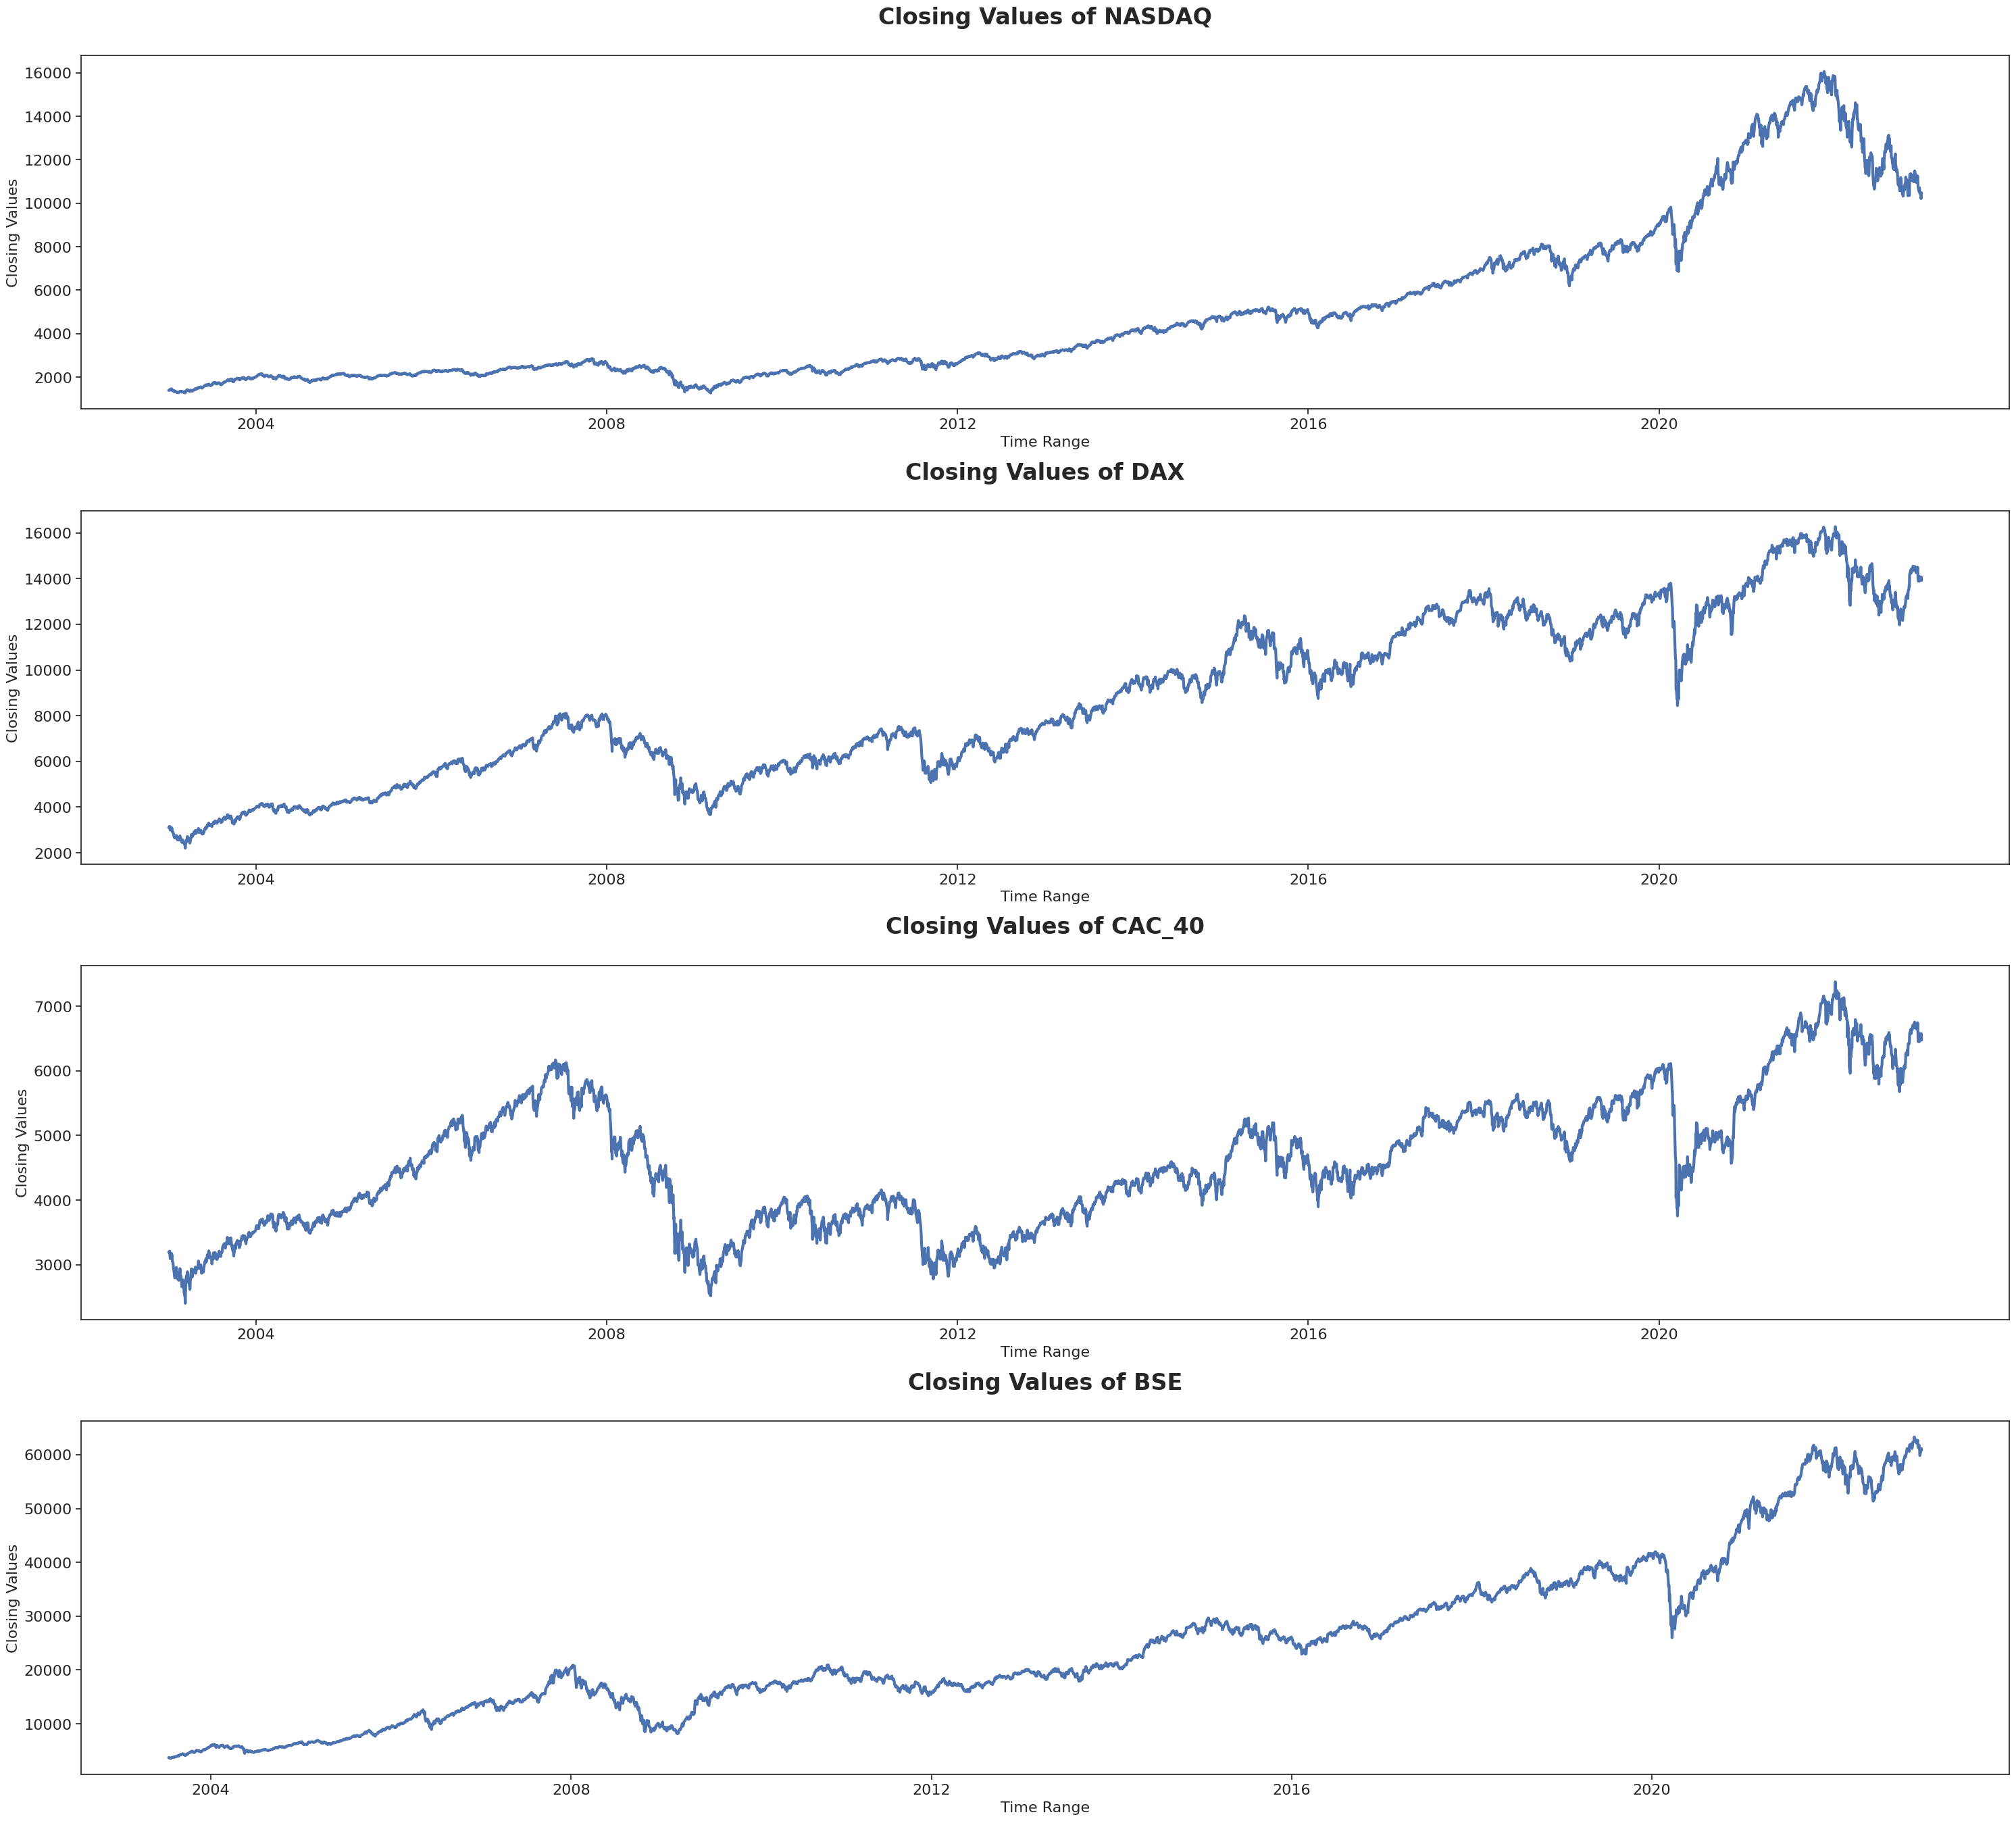

In [ ]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(0,len(indexes)):
  plot(dfoflist[i], indexes[i],'Close',i+1)

plt.tight_layout()
plt.savefig('Fig1:Closing_values.png')
# files.download("Fig1:Closing_values.png") 

In [ ]:
moving_avg = [10, 30, 50]

for ma in moving_avg:
    for df in dfoflist:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Adj Close'].rolling(ma+1).apply(lambda x: x[:-1].mean(), raw=True)

def moving_avg_plot(i):
  plt.subplot(6, 1, i+1)
  plt.plot(dfoflist[i]['Date'],dfoflist[i][['Close', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']])
  plt.legend(dfoflist[i][['Close', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']],loc = 2,fontsize = 16)
  plt.xlabel('Time Range',fontsize = 16)
  plt.ylabel('Moving Averages',fontsize = 16)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.title("Moving Averages for {} \n".format(indexes[i]),fontsize = 24,
            fontweight="bold")

## *Moving Averages for all Indexes*

In [ ]:
for df in dfoflist:
  df['Daily Return'] = df['Close'].pct_change()

In [ ]:
def daily_return_plot(i):
  plt.subplot(6, 1, i+1)
  plt.plot(dfoflist[i]['Date'],dfoflist[i]['Daily Return'], color="purple", linestyle="--",linewidth=2)
  plt.legend(dfoflist[i][['Daily Return']],loc = 2,fontsize = 16)
  plt.xlabel('Time Range',fontsize = 16)
  plt.ylabel('Daily Returns',fontsize = 16)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.title("Daily Returns for {}\n".format(indexes[i]),fontsize = 24,
            fontweight="bold")

## *Daily Returns for all Indexes*

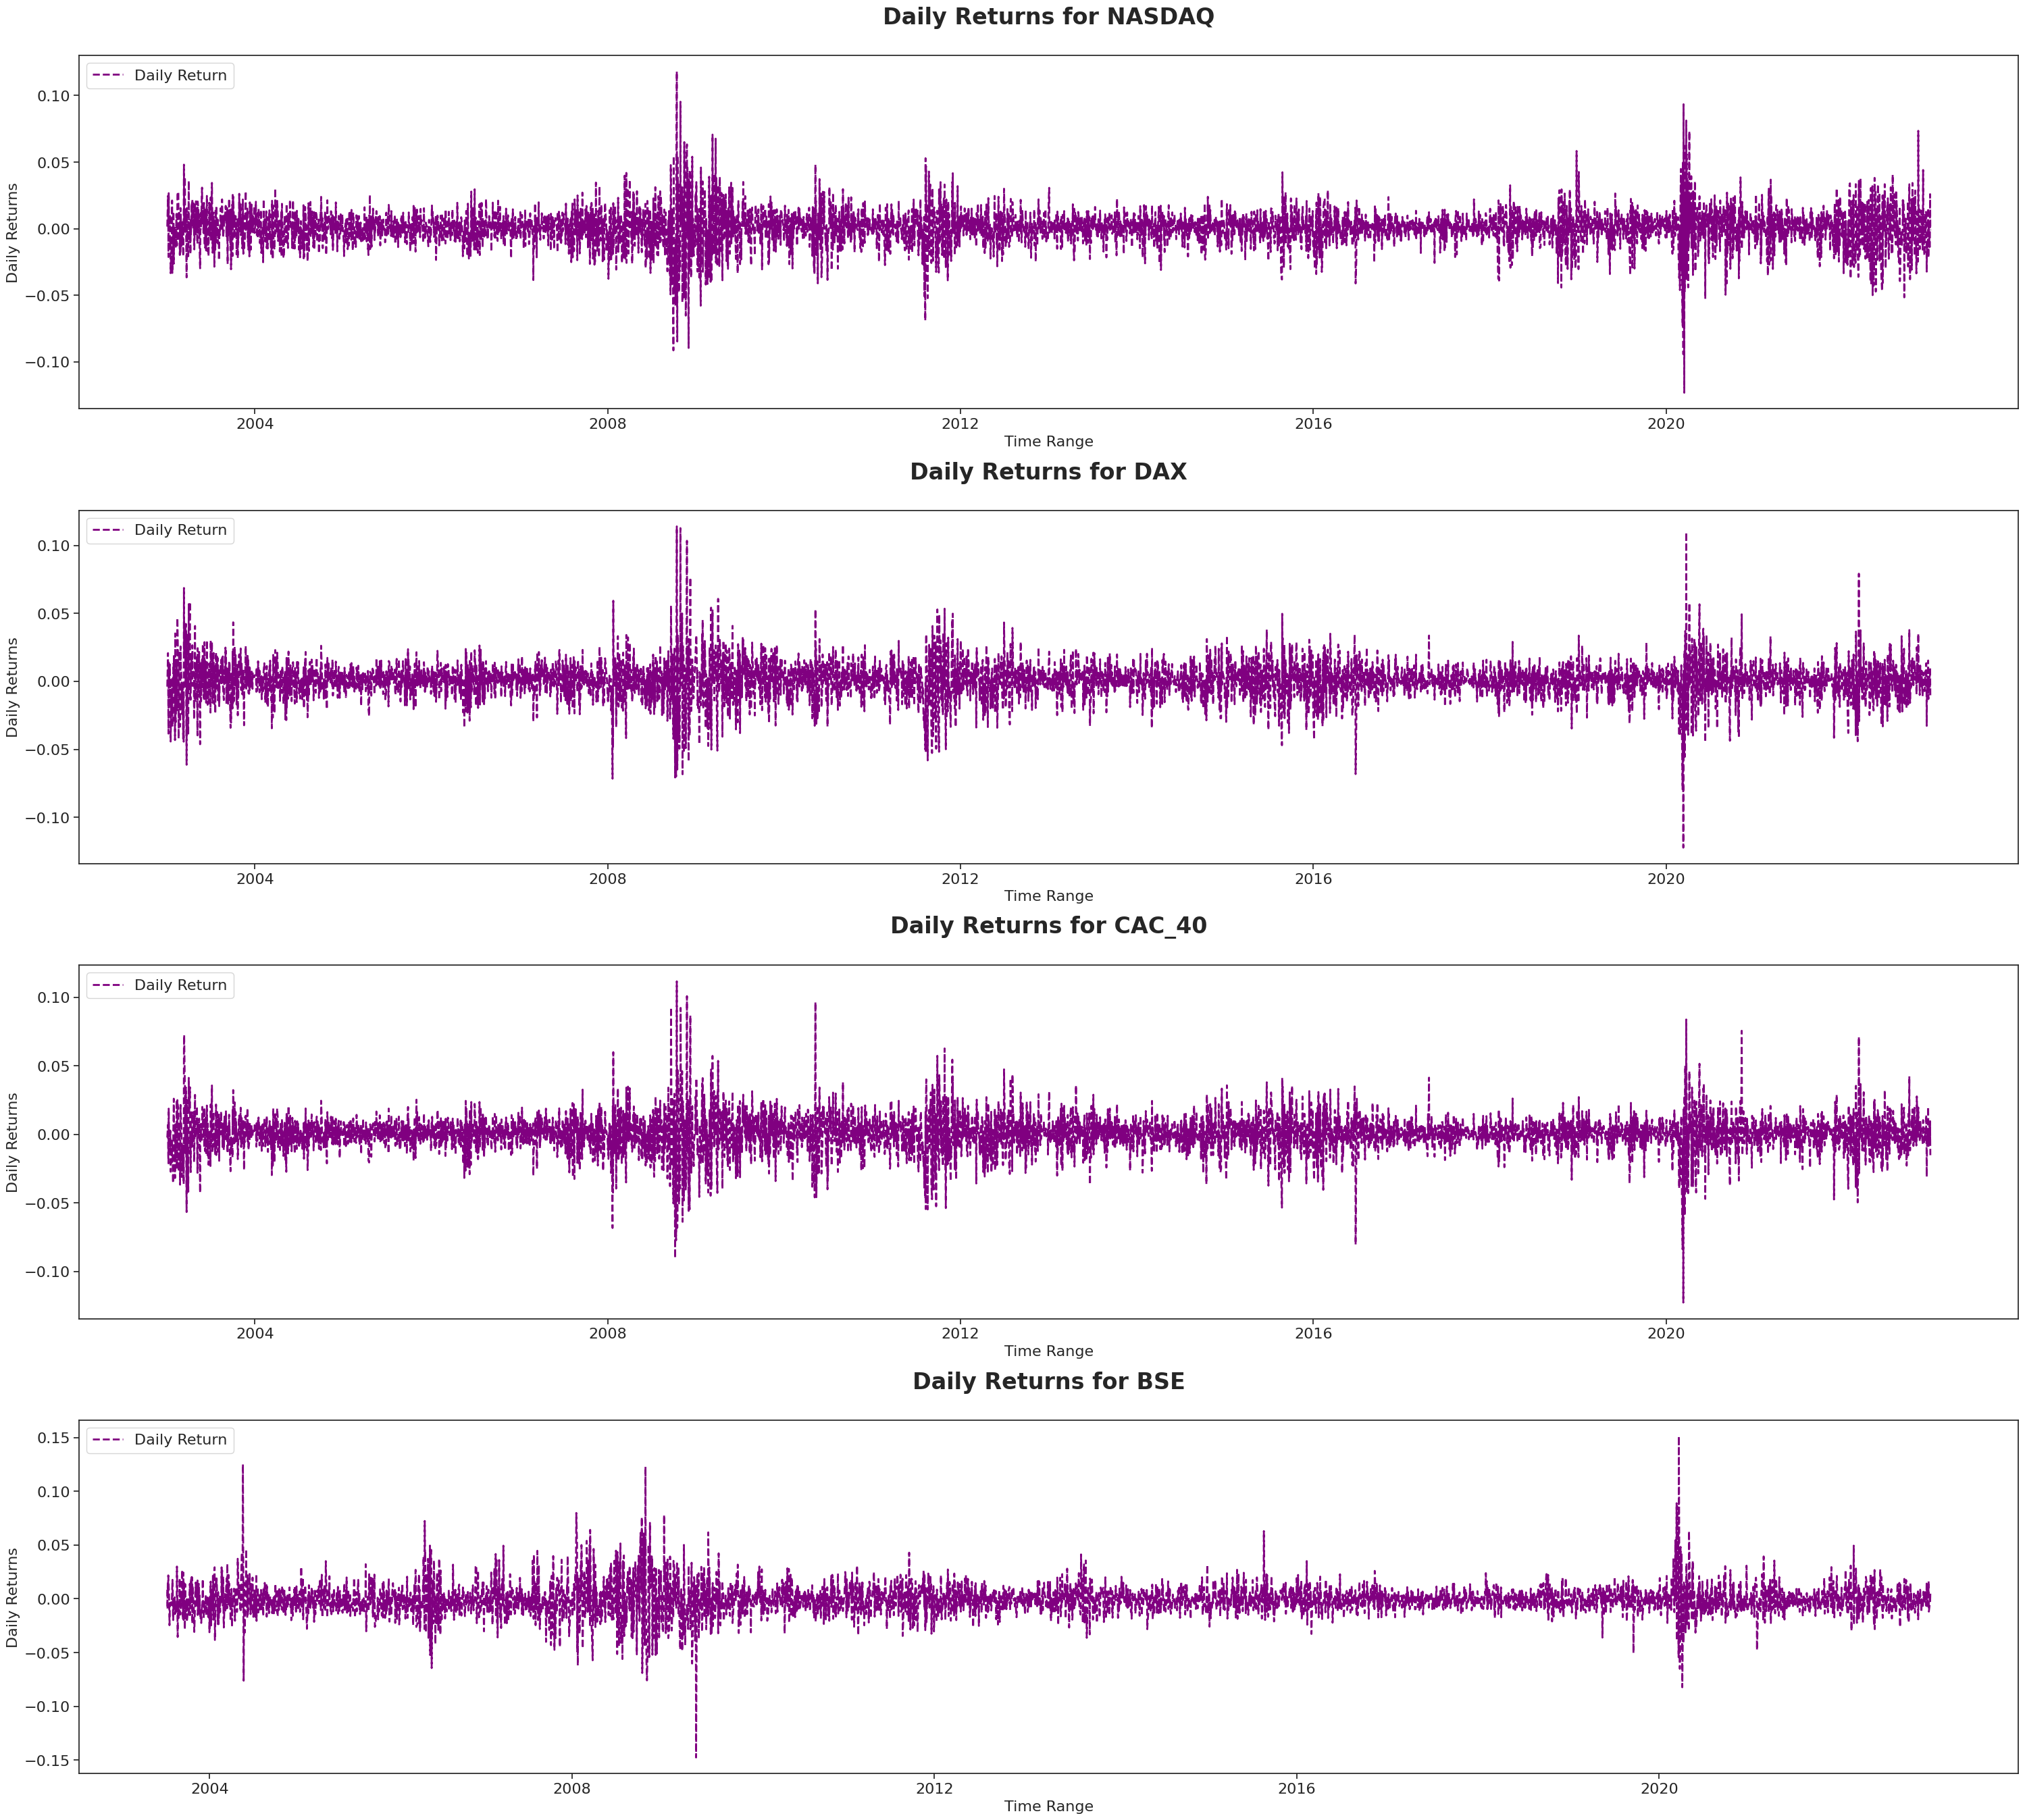

In [ ]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(0,len(indexes)):
  daily_return_plot(i)

plt.tight_layout()
plt.savefig('Fig4:Daily_returns.png')
# files.download("Fig4:Daily_returns.png") 

## *Normalizing Data*

In [ ]:
dfoflist_copy = []
for d in dfoflist:
  dfoflist_copy.append(d)

dfoflist_copy[0].index = dfoflist_copy[0]["Date"]
dfoflist_copy[1].index = dfoflist_copy[1]["Date"]
dfoflist_copy[2].index = dfoflist_copy[2]["Date"]
dfoflist_copy[3].index = dfoflist_copy[3]["Date"]



In [ ]:
close_df = pd.DataFrame()
close_df['NASDAQ'] = dfoflist_copy[0]['Close'] #[dfoflist[0].Date.isin(common)]
close_df['DAX'] = dfoflist_copy[1]['Close'] #[dfoflist[1].Date.isin(common)]
close_df['CAC_40'] = dfoflist_copy[2]['Close'] #[dfoflist[2].Date.isin(common)]
close_df['BSE'] = dfoflist_copy[3]['Close'] #[dfoflist[3].Date.isin(common)]


In [ ]:
close_df[15:].head(5)

,NASDAQ,DAX,CAC_40,BSE
Date,,,,
2003-01-24,1342.140015,2717.820068,2898.600098,NaN
2003-01-27,1325.270020,2643.800049,2795.780029,NaN
2003-01-28,1342.180054,2671.360107,2800.070068,NaN
2003-01-29,1358.060059,2706.570068,2840.050049,NaN
2003-01-30,1322.349976,2693.780029,2914.129883,NaN


In [ ]:
normalized_closedf=(close_df-close_df.min())/(close_df.max()-close_df.min())

In [ ]:
normalized_closedf[15:].head(5)

,NASDAQ,DAX,CAC_40,BSE
Date,,,,
2003-01-24,0.004970,0.036596,0.099644,NaN
2003-01-27,0.003829,0.031335,0.078969,NaN
2003-01-28,0.004973,0.033294,0.079832,NaN
2003-01-29,0.006046,0.035796,0.087871,NaN
2003-01-30,0.003632,0.034887,0.102766,NaN


In [ ]:
tech_rets = close_df.pct_change()
tech_rets.head()

,NASDAQ,DAX,CAC_40,BSE
Date,,,,
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.001610,-0.003897,-0.002235,NaN
2003-01-06,0.024685,0.020793,0.007024,NaN
2003-01-07,0.007212,-0.014088,-0.015351,NaN
2003-01-08,-0.021305,-0.038477,-0.021164,NaN


## *Co - relation Between Each Index*

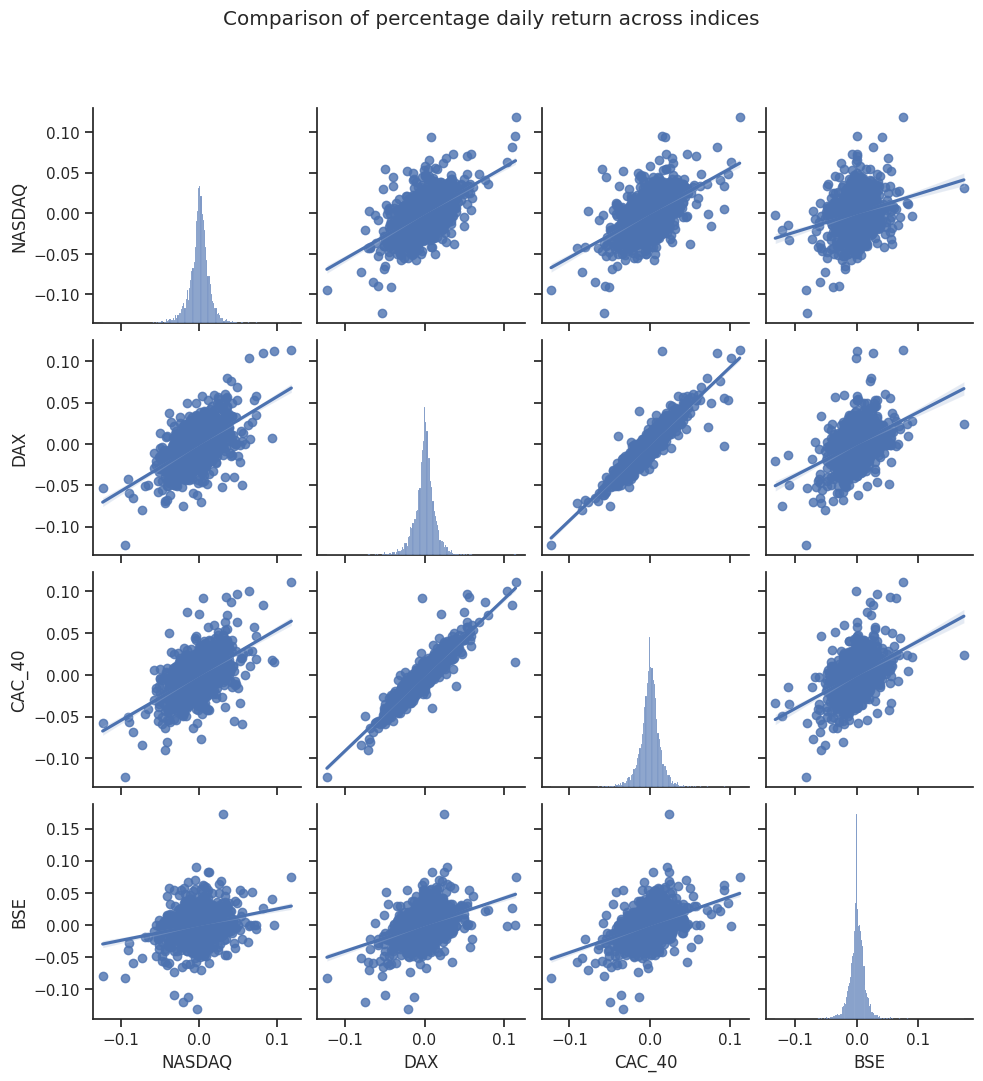

In [ ]:
pp = sns.pairplot(tech_rets, kind='reg')
pp.fig.suptitle("Comparison of percentage daily return across indices", y=1.08)
plt.show()
pp.savefig('Fig5:Comparison_of_percentage_daily_return_across_indices.png')
# files.download("Fig5:Comparison_of_percentage_daily_return_across_indices.png") 

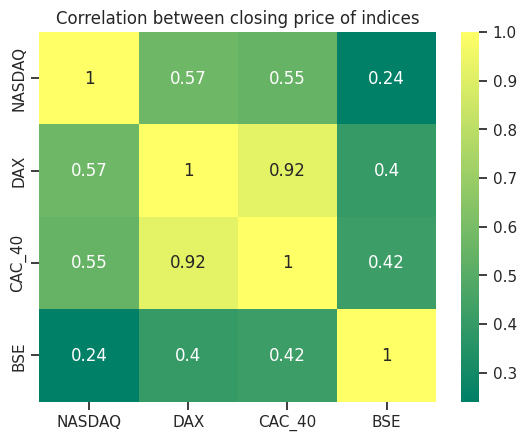

In [ ]:
ax = plt.axes()
hm = sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', ax=ax)
ax.set_title('Correlation between closing price of indices')
plt.show()
fig = hm.get_figure()
fig.savefig('Fig6:Heatmap_showing_correlation_across_indices.png')


# **Phase - II Prediction**

# **SME, EME

## *Defining Functions*

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import StandardScaler
from keras.layers import Input
from keras.layers import LSTM
from keras.models import Model

from sklearn.preprocessing import MinMaxScaler

In [ ]:

stockprices = dfoflist[0]
stockprices = stockprices.sort_index()
stockprices.head()
stockprices.dropna(subset=['Close'], how='all', inplace=True)

test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = stockprices[:train_size][['Date', 'Close']]
test = stockprices[train_size:][['Date', 'Close']]

train_size: 4028
test_size: 1007


In [ ]:
## Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(data, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset 
        N - window size, e.g., 50 for 50 days of historical stock prices
        offset - position to start the split
    """
    X, y = [], []
    
    for i in range(offset, len(data)):
        X.append(data[i-N:i])
        y.append(data[i])
    
    return np.array(X), np.array(y)

In [ ]:

def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))                
    return rmse

def calculate_mape(y_true, y_pred): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)    
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100   
    return mape

In [ ]:
def calculate_perf_metrics(var, logNeptune=False, logmodelName='Simple MA'):
    ### RMSE 
    rmse = calculate_rmse(np.array(stockprices[train_size:]['Close']), np.array(stockprices[train_size:][var]))
    ### MAPE 
    mape = calculate_mape(np.array(stockprices[train_size:]['Close']), np.array(stockprices[train_size:][var]))
    
    if logNeptune:        
        npt_exp.send_metric('RMSE', rmse)
        npt_exp.log_metric('RMSE', rmse)
        
        npt_exp.send_metric('MAPE (%)', mape)
        npt_exp.log_metric('MAPE (%)', mape)
    
    return rmse, mape

In [ ]:
def plot_stock_trend(var, var_200, cur_title, stockprices=stockprices, logNeptune=False, logmodelName='Simple MA'):
    #ax = stockprices[['Close', var,'200day']].plot(figsize=(20, 10))
    plt.plot(stockprices['Date'], stockprices['Close'], color='b', label='Close')
    plt.plot(stockprices['Date'], stockprices[var], color='r', label=var)
    plt.plot(stockprices['Date'], stockprices[var_200], color='g', label=var_200)
    plt.grid(False)
    plt.title(cur_title,fontsize = 32, fontweight="bold")
    plt.axis('tight')
    # plt.ylabel('Stock Price ($)')
    plt.xlabel('Date',fontsize = 16, fontweight="bold")
    plt.ylabel('Stock Price',fontsize = 16, fontweight="bold")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc="upper left",fontsize = 22)
    
    if logNeptune:
        npt_exp.log_image(f'Plot of Stock Predictions with {logmodelName}', ax.get_figure())

##*SMA*

train_size: 3834
test_size: 958
RSME SMA 50 day:  2511.4986021277823
MAPE SMA 50 day: 4.3869642351308995
RSME SMA 200 day:  4890.276067789458
MAPE SMA 200 day: 8.437711484562085


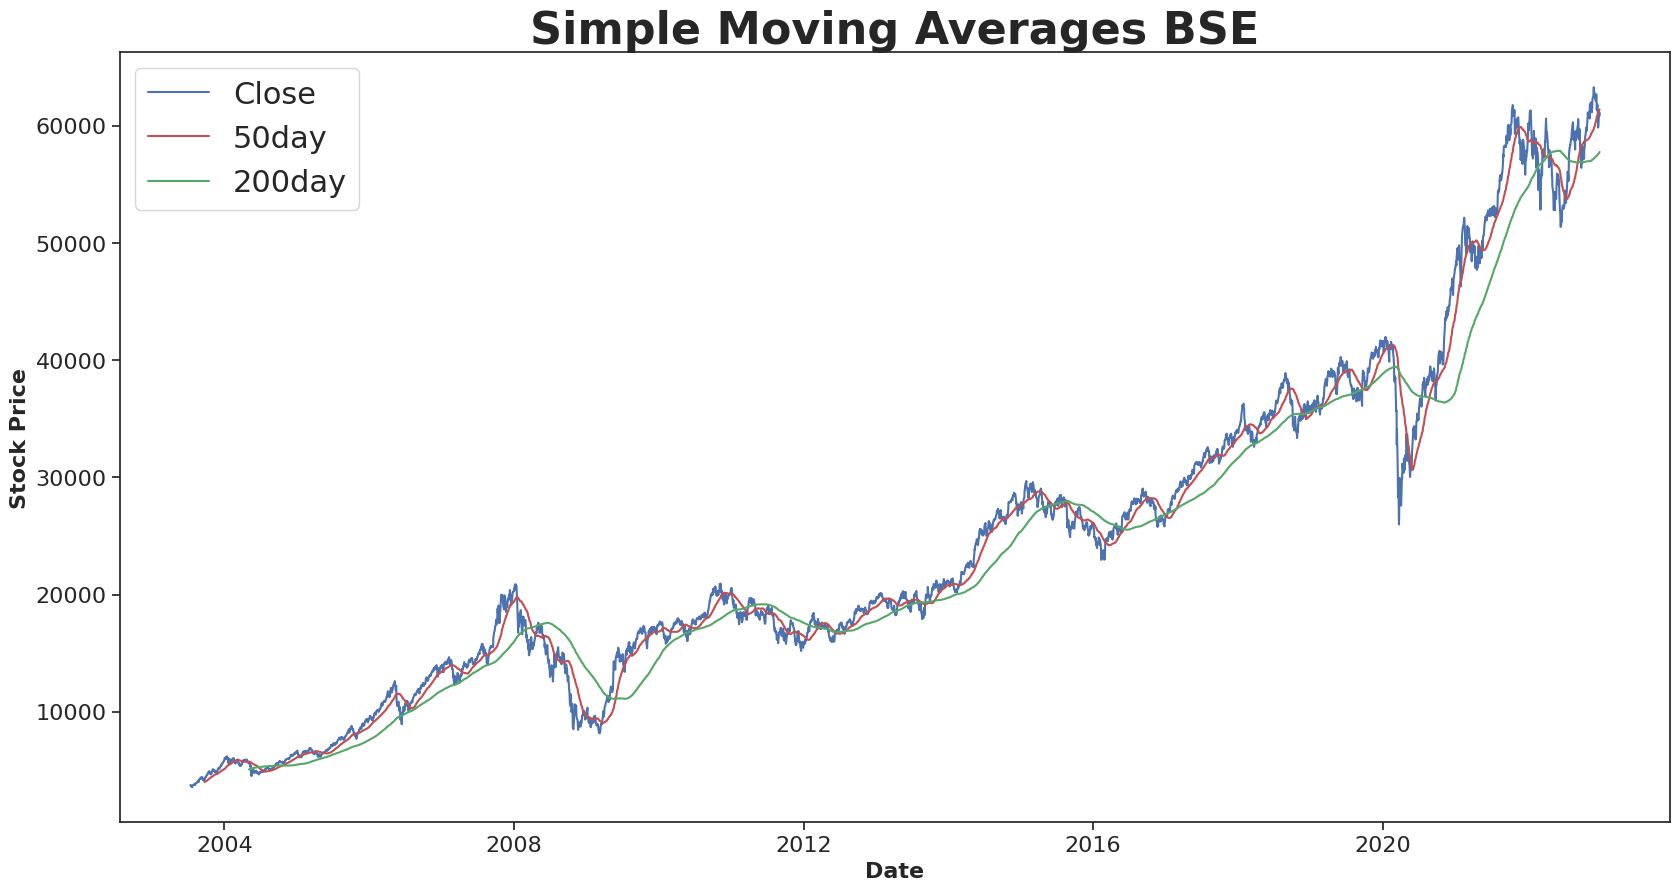

In [ ]:
#for all indices

#for i in range(6):
i=3
stockprices = dfoflist[i]
stockprices = stockprices.sort_index()
stockprices.head()
stockprices.dropna(subset=['Close'], how='all', inplace=True)

test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = stockprices[:train_size][['Date', 'Close']]
test = stockprices[train_size:][['Date', 'Close']]

window_size = [50, 200]

window_var = str(window_size[0]) + 'day'
    
stockprices[window_var] = stockprices['Close'].rolling(window_size[0]+1).apply(lambda x: x[:-1].mean(), raw=True)
### Include a 200-day SMA for reference 
stockprices['200day'] = stockprices['Close'].rolling(window_size[1]+1).apply(lambda x: x[:-1].mean(), raw=True)
    
### Plot and performance metrics for SMA model
plot_stock_trend(var='50day', var_200='200day', cur_title='Simple Moving Averages ' + indexes[i], stockprices=stockprices, logmodelName='Simple MA')
rmse_sma, mape_sma = calculate_perf_metrics(var=window_var, logmodelName='Simple MA')
rmse_sma_200, mape_sma_200 = calculate_perf_metrics(var='200day', logmodelName='Simple MA')
print("RSME SMA 50 day: ", rmse_sma)
print("MAPE SMA 50 day:", mape_sma)
print("RSME SMA 200 day: ", rmse_sma_200)
print("MAPE SMA 200 day:", mape_sma_200)

##*EMA*

train_size: 3834
test_size: 958
RSME SMA 50 day:  2174.7674513040224
MAPE SMA 50 day: 3.7943843855824526
RSME SMA 200 day:  4323.610934801843
MAPE SMA 200 day: 7.587339729185954


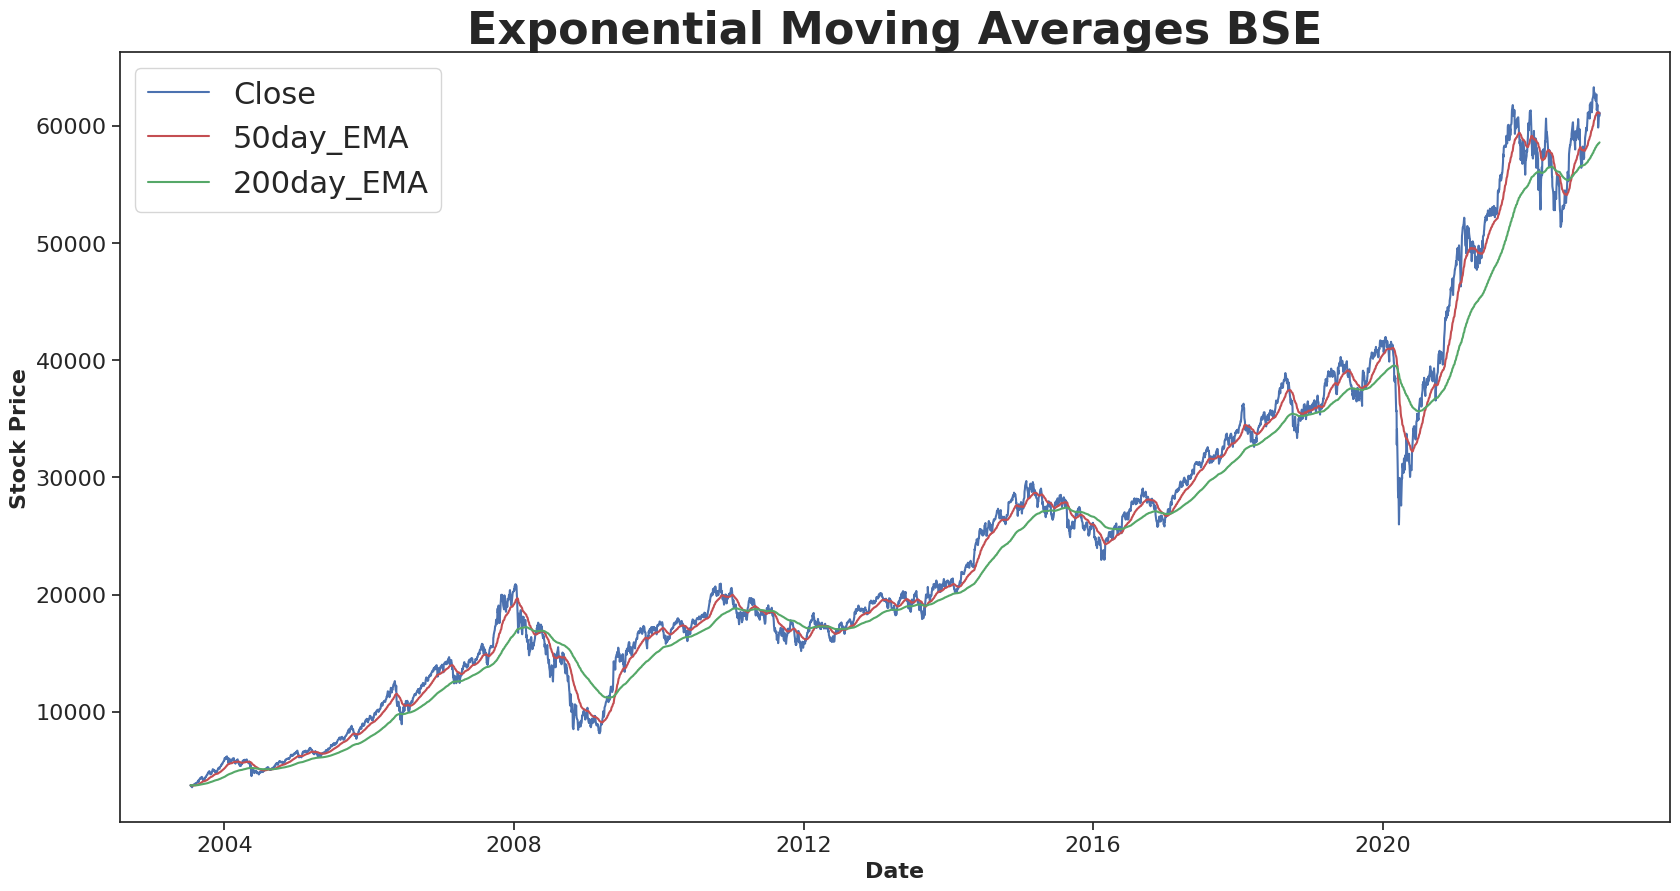

In [ ]:
# for i in range(3):
i = 3
stockprices = dfoflist[i]
stockprices = stockprices.sort_index()
stockprices.head()
stockprices.dropna(subset=['Close'], how='all', inplace=True)

test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = stockprices[:train_size][['Date', 'Close']]
test = stockprices[train_size:][['Date', 'Close']]

window_size = [50, 200]

window_var = str(window_size[0]) + 'day'
window_ema_var = window_var +'_EMA'
# Calculate the 50-day exponentially weighted moving average
stockprices['50day_EMA'] = stockprices['Close'].ewm(span=50, adjust=False).mean().shift(1)
stockprices['200day_EMA'] = stockprices['Close'].ewm(span=200, adjust=False).mean().shift(1)
    
### Plot and performance metrics for EMA model
plot_stock_trend(var='50day_EMA', var_200='200day_EMA', cur_title='Exponential Moving Averages ' + indexes[i], stockprices=stockprices, logmodelName='Exp MA')
rmse_ema, mape_ema = calculate_perf_metrics(var='50day_EMA', logmodelName='Exponential MA')
rmse_ema_200, mape_ema_200 = calculate_perf_metrics(var='200day_EMA', logmodelName='Exponential MA')
print("RSME SMA 50 day: ", rmse_ema)
print("MAPE SMA 50 day:", mape_ema)
print("RSME SMA 200 day: ", rmse_ema_200)
print("MAPE SMA 200 day:", mape_ema_200)

##*LSTM*

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 25)            2700      
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8,476
Trainable params: 8,476
Non-trainable params: 0
_________________________________________________________________
None
30/30 [==============================] - 1s 13ms/step
RMSE:  3094.570511837021


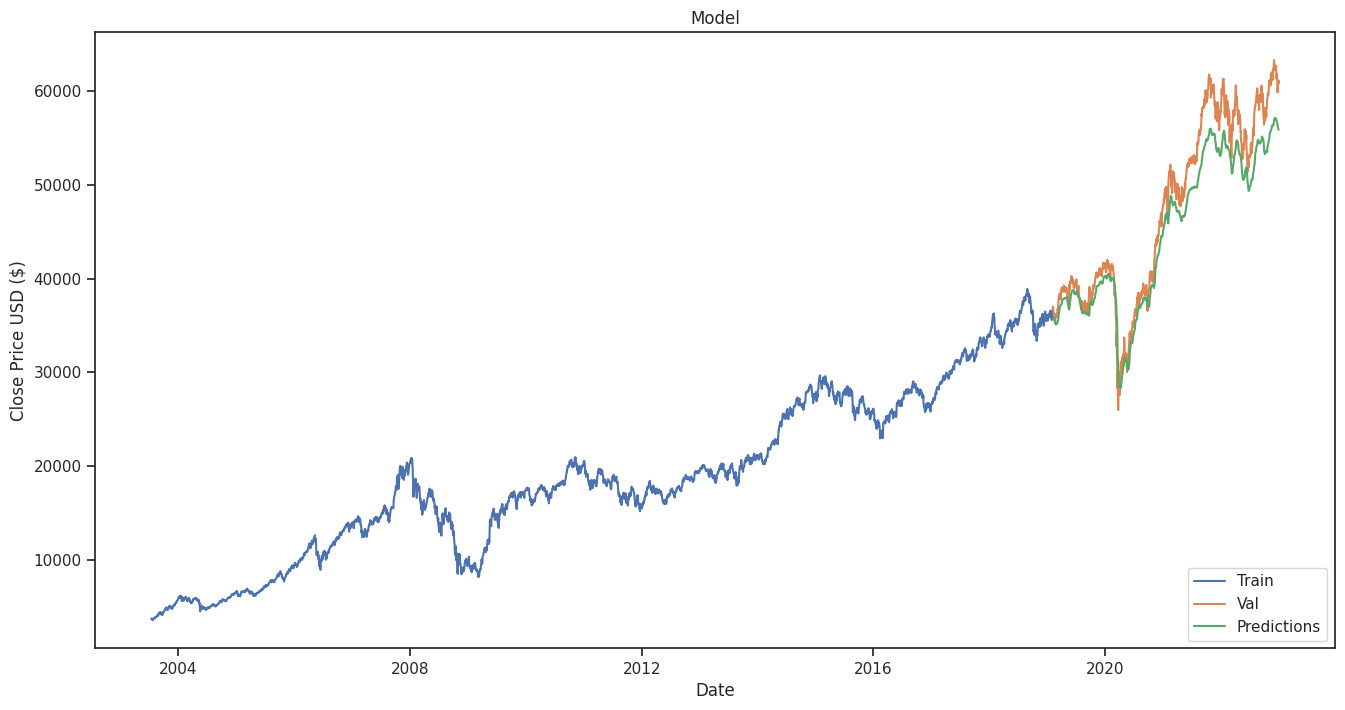

In [ ]:
import keras
from keras import layers
import math
from sklearn.metrics import mean_squared_error
i = 3 #Change this to see different index.
if i==3:
  stock_data = dfoflist[i][::-1]
else:
  stock_data = dfoflist[i]
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(values.reshape(-1,1)[0:training_data_len,:])
scaled_data = scaler.transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.Sequential()
model.add(layers.LSTM(25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(25, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
print(model.summary())


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=1)

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
# rmse = math.sqrt(mean_squared_error(y_test.tolist(), np.squeeze(predictions, axis=1).tolist()))
# print("RMSE: ", rmse)

data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
rmse = math.sqrt(mean_squared_error(y_test.tolist(), np.squeeze(predictions, axis=1).tolist()))
print("RMSE: ", rmse)

30/30 [==============================] - 1s 16ms/step
RMSE:  3094.570511837021


In [ ]:
pred = np.squeeze(predictions, axis=1)
pred.shape

(958,)

## 1d cnn

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 58, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1856)              0         
                                                                 
 dense_6 (Dense)             (None, 50)                92850     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 93,157
Trainable params: 93,157
Non-trainable params: 0
__________________________________________________

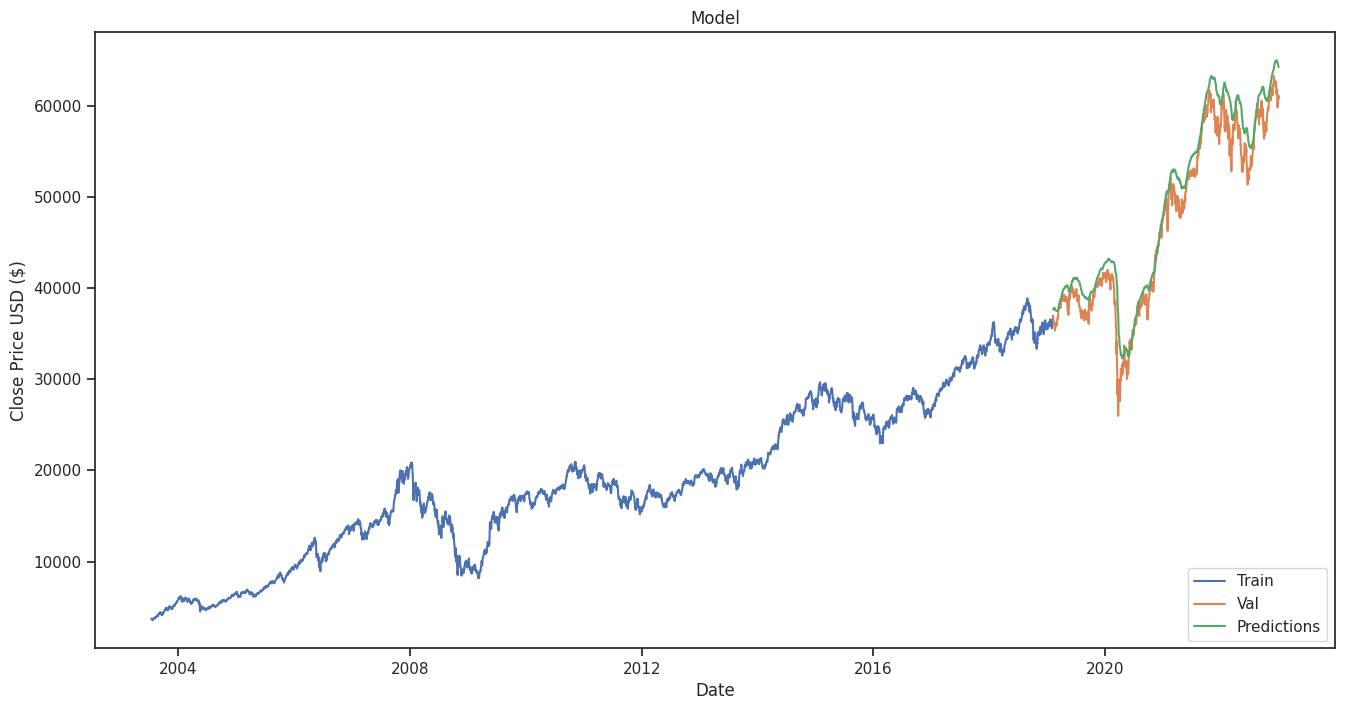

In [ ]:
import keras
from keras import layers
import math

i = 3 #Change this to see different index.
if i == 3:
  stock_data = dfoflist[i][::-1]
else:
  stock_data = dfoflist[i]
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(values.reshape(-1,1)[0:training_data_len,:])
scaled_data = scaler.transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

print(model.summary())

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=1)

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
# rmse = np.sqrt(np.mean((predictions - y_test)**2))
# print("RMSE: ", rmse)

data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
rmse = math.sqrt(mean_squared_error(y_test.tolist(), np.squeeze(predictions, axis=1).tolist()))
print("RMSE: ", rmse)

30/30 [==============================] - 0s 2ms/step
RMSE:  2391.6598730469796


# SVR

(958,)
RMSE:  3457.585641508251


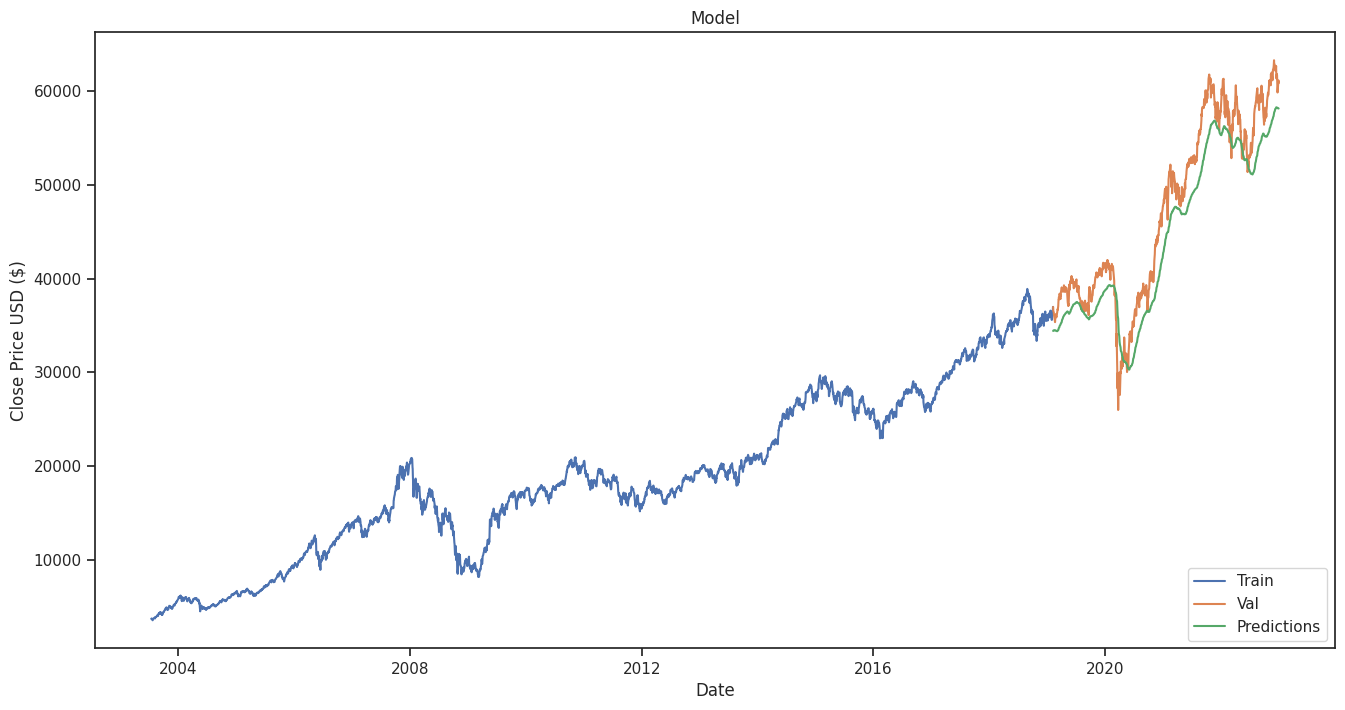

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import math

i = 3 #Change this to see different index.
if i == 3:
    stock_data = dfoflist[i][::-1]
else:
    stock_data = dfoflist[i]
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(values.reshape(-1,1)[0:training_data_len,:])
scaled_data = scaler.transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = np.array(close_prices[training_data_len:])

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

model = SVR(kernel='linear', C=1, max_iter=200)
model.fit(x_train, y_train)

predictions = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1]))

predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
print(y_test.shape)
y_test = y_test.reshape(-1, 1)

rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("RMSE: ", rmse)

data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
